## Taiwan Credit Scoring Analysis

In [126]:
# This research employed a binary variable, default payment (Yes = 1, No = 0 and used the 23 variables 

In [127]:
import pandas as pd

df = pd.read_csv("credit_raw.csv", sep=',', header = 0)

In [128]:
df = df.set_index("ID")

df.columns = ["Given Credit", "Gender", "Education", "Marital Status", "Age", "Pay Status (Sep/2005)", "Pay Status (Aug/2005)", 
                "Pay Status (Jul/2005)", "Pay Status (Jun/2005)", "Pay Status (May/2005)", "Pay Status (Apr/2005)", 
                "Bill (Sep/2005)", "Bill (Aug/2005)", "Bill (Jul/2005)", "Bill (Jun/2005)", "Bill (May/2005)", "Bill (Apr/2005)",
                "Amount Paid (Sep/2005)", "Amount Paid (Aug/2005)", "Amount Paid (Jul/2005)", "Amount Paid (Jun/2005)",
                "Amount Paid (May/2005)", "Amount Paid (Apr/2005)", "Default Payment"] 

In [129]:
df.head()

,Given Credit,Gender,Education,Marital Status,Age,Pay Status (Sep/2005),Pay Status (Aug/2005),Pay Status (Jul/2005),Pay Status (Jun/2005),Pay Status (May/2005),...,Bill (Jun/2005),Bill (May/2005),Bill (Apr/2005),Amount Paid (Sep/2005),Amount Paid (Aug/2005),Amount Paid (Jul/2005),Amount Paid (Jun/2005),Amount Paid (May/2005),Amount Paid (Apr/2005),Default Payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Histogram of Age per Gender

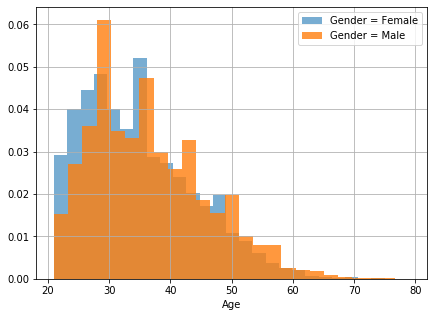

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.xlabel('Age')

df[df.Gender==2]['Age'].hist(alpha=0.6,bins=25,label='Gender = Female', density=True)
df[df.Gender==1]['Age'].hist(alpha=0.8,bins=25,label='Gender = Male', density=True)

plt.xlabel('Age')
plt.legend()

### Barplot Given Credit per Marital Status 

[Text(0, 0, 'No Information'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'Others')]

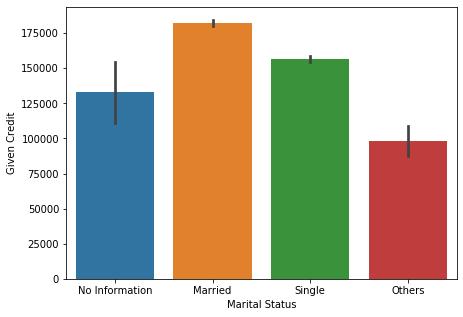

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

fig = sns.barplot(x=df['Marital Status'], y=df['Given Credit'], linewidth = 2)

fig.set_xticklabels(['No Information', 'Married', 'Single', 'Others'], minor=False, rotation=0)

### Scatterplot Given Credit per Age discretized by Gender

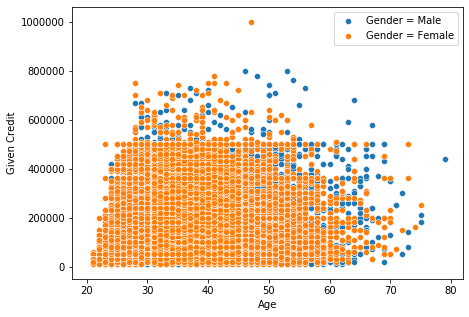

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

sns.scatterplot(x=df[df.Gender==1]['Age'], y=df['Given Credit'],label='Gender = Male')
sns.scatterplot(x=df[df.Gender==2]['Age'], y=df['Given Credit'],label='Gender = Female')

In [133]:
edu = df['Education'].value_counts()
print(edu)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64


In [134]:
df['Education'] = df['Education'].replace([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 4, 4])
edu = df['Education'].value_counts()
print(edu)

2    14030
1    10585
3     4917
4      454
0       14
Name: Education, dtype: int64


### Boxplot of Giver Credit per Education Level discretized by Gender

[Text(0, 0, 'No Information'),
 Text(0, 0, 'Graduate'),
 Text(0, 0, 'University'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'Others')]

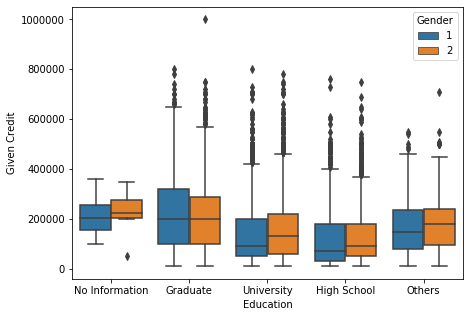

In [135]:
import seaborn as sns

plt.figure(figsize=(7, 5))
fig = sns.boxplot(x='Education',y='Given Credit', hue='Gender',data=df)

fig.set_xticklabels(['No Information', 'Graduate', 'University', 'High School', 'Others'], minor=False, rotation=0)